In [1]:
# PYTHON PROJECT 2 - Comparison of readmissions for women age group 20-40 to men age group 20-40.

In [2]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [3]:
# Importing Data

df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [4]:
# Data Exploration - Basic Info

df.shape

(101766, 50)

In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [25]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
df.tail(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101756,443842070,140199494,Other,Female,[60-70),?,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
101757,443842136,181593374,Caucasian,Female,[70-80),?,1,1,7,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101758,443842340,120975314,Caucasian,Female,[80-90),?,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101759,443842778,86472243,Caucasian,Male,[80-90),?,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101760,443847176,50375628,AfricanAmerican,Female,[60-70),?,1,1,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [9]:
df['encounter_id'].duplicated().any()

False

In [10]:
# Data Cleaning df - Checking for standard null values and non standard values

df[['age','readmitted','gender']].isnull().sum()

age           0
readmitted    0
gender        0
dtype: int64

In [11]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [12]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [13]:
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [14]:
# Data Cleaning df - Reloading df with Non Standard Missing Values "Unknown/Invalid" to Standard NaN, and dropping NaN values

missing_values = ["Unknown/Invalid"]
df = pd.read_csv ('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv',
                na_values = missing_values).dropna()

df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
162,2521974,80499960,Caucasian,Male,[80-90),?,6,3,7,5,...,No,No,No,No,No,No,No,No,No,<30
192,2595612,89193870,Caucasian,Female,[40-50),?,6,1,7,2,...,No,No,No,No,No,No,No,No,No,>30
460,4084524,76959585,AfricanAmerican,Female,[70-80),?,6,1,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,>30
593,4804968,114960726,Caucasian,Female,[50-60),?,6,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,NO
696,5319174,87847776,Other,Male,[70-80),?,6,6,7,11,...,No,No,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100386,424989572,103832127,Caucasian,Male,[60-70),?,2,1,1,6,...,No,No,No,No,No,No,No,No,Yes,<30
100493,426670736,101755908,Caucasian,Female,[40-50),?,1,1,7,3,...,No,No,No,No,No,No,No,No,No,NO
100578,427875206,90285327,Caucasian,Female,[60-70),?,1,2,7,4,...,No,No,No,No,No,No,No,No,No,NO
101029,433822712,104106645,Caucasian,Male,[50-60),?,1,1,7,7,...,No,No,No,No,No,No,No,Ch,Yes,>30


In [15]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
# Data Cleaning df - Subsetting to df1 for output with needed columns only

df[['encounter_id','patient_nbr','gender','age','readmitted']]
df1 = df[['encounter_id','patient_nbr','gender','age','readmitted']]

df1

,encounter_id,patient_nbr,gender,age,readmitted
162,2521974,80499960,Male,[80-90),<30
192,2595612,89193870,Female,[40-50),>30
460,4084524,76959585,Female,[70-80),>30
593,4804968,114960726,Female,[50-60),NO
696,5319174,87847776,Male,[70-80),NO
...,...,...,...,...,...
100386,424989572,103832127,Male,[60-70),<30
100493,426670736,101755908,Female,[40-50),NO
100578,427875206,90285327,Female,[60-70),NO
101029,433822712,104106645,Male,[50-60),>30


In [17]:
# Data Cleaning df1 - Subsetting to df2 with bitwise "OR" symbol for output with only the needed age groups 20-30 + 30-40 + 40-50

df1[(df1['age'] == '[20-30)') | (df1['age'] == '[30-40)') | (df1['age'] == '[40-50)')]
df2 = df1[(df1['age'] == '[20-30)') | (df1['age'] == '[30-40)') | (df1['age'] == '[40-50)')]

df2

,encounter_id,patient_nbr,gender,age,readmitted
192,2595612,89193870,Female,[40-50),>30
771,5993358,60354486,Female,[30-40),>30
1280,9030192,108960345,Female,[40-50),>30
5148,27399102,107744535,Male,[40-50),>30
8269,37676100,11437938,Female,[20-30),NO
...,...,...,...,...,...
90541,297169634,89580861,Female,[20-30),>30
96458,375554168,34309476,Female,[30-40),<30
97738,392494568,100301679,Male,[30-40),NO
100493,426670736,101755908,Female,[40-50),NO


In [18]:
# Data Cleaning df2 - Subsetting to df3 for output only with needed instances where mbr was readmitted over or under 30 days

df2[(df2['readmitted'] == '>30') | (df2['readmitted'] == '<30')]
df3 = df2[(df2['readmitted'] == '>30') | (df2['readmitted'] == '<30')]

df3.head()

,encounter_id,patient_nbr,gender,age,readmitted
192,2595612,89193870,Female,[40-50),>30
771,5993358,60354486,Female,[30-40),>30
1280,9030192,108960345,Female,[40-50),>30
5148,27399102,107744535,Male,[40-50),>30
11978,49106322,96818643,Male,[40-50),>30


In [19]:
# Data Cleaning df2 - Renaming columns

df3 = df3.rename(columns={'encounter_id' : 'Encounter ID', 'patient_nbr' : 'Patient #', 'gender' : 'Gender', 'age' : 'Age', 'readmitted' : 'Readmitted'})

df3.count()

Encounter ID    36
Patient #       36
Gender          36
Age             36
Readmitted      36
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

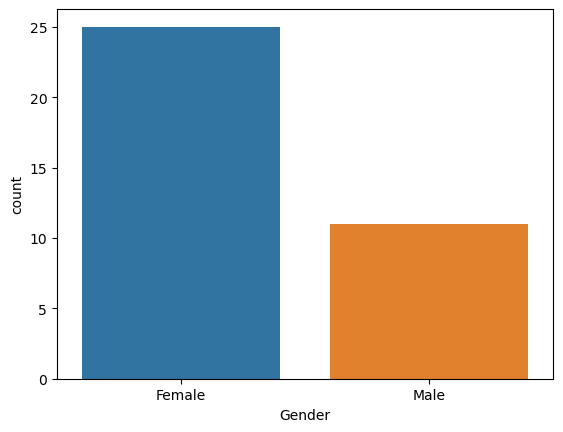

In [20]:
# Data Visualization - Countplot 

sns.countplot (x="Gender", data=df3)

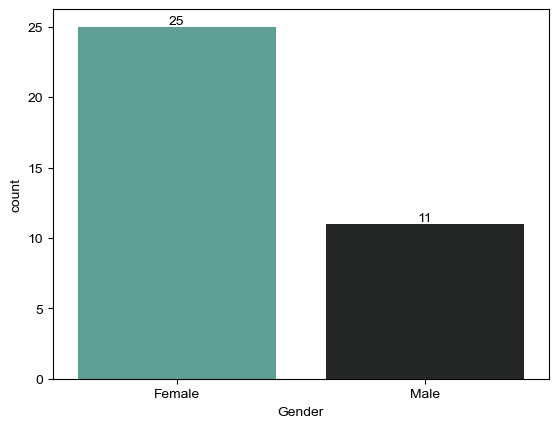

In [21]:
ax = sns.countplot (x = 'Gender', data = df3, palette = "dark:#5A9_r")
ax.bar_label(ax.containers[0])
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale = 1)

[Text(0.5, 1.0, 'Readmissions based on Gender and Age'),
 Text(0, 0.5, 'Readmission Count')]

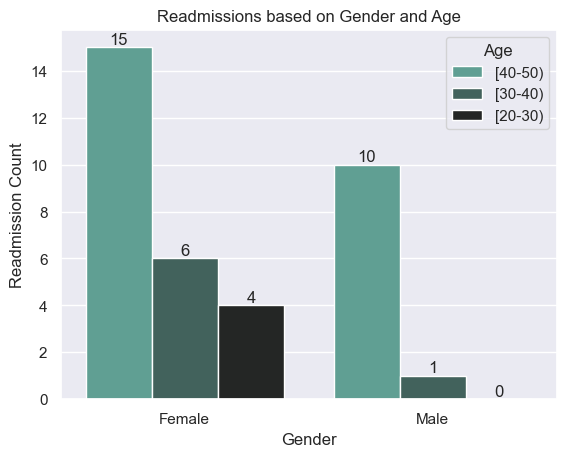

In [22]:
ax = sns.countplot (x = 'Gender', hue = 'Age', data = df3, palette = "dark:#5A9_r")
for container in ax.containers:
    ax.bar_label(container)
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale = 1)
ax.set (title = 'Readmissions based on Gender and Age', ylabel = 'Readmission Count')

In [23]:
# Conclusion: Based on the visualization, women are readmitted at a higher rate when compared to men. 
# Conclusion: The age group of 40-50 has the highest number of readmissions for both women and men when compared to other age groups.